<a href="https://colab.research.google.com/github/RautRitesh/langgraph/blob/main/Multiagent_interviewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install langchain langgraph langchain-groq langchain-core langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
from google.colab import userdata
api_key=userdata.get('groq_api_key')

In [3]:
parsed_data_resume={'full_name': 'Ritesh Raut',
                    'summary': 'I am a dedicated and passionate undergraduate Computer Science student with extensive research experience in Deep Learning, Natural Language Processing (NLP), RAG architectures, autonomous AI agents, and production-grade system development.',
                    'email': 'ritesh222@gmail.com',
                    'phone': '+977-12345678',
                    'skills': ['Python', 'C++', 'Julia', 'JavaScript', 'Dart', 'C#', 'TensorFlow', 'Scikit-learn', 'Pandas', 'NumPy', 'FAISS', 'LangChain', 'Hugging Face Transformers', 'RAG Architectures', 'SpaCy', 'NLTK', 'Git', 'GitHub', 'FastAPI', 'Django', 'Linux/Unix environments', 'Deep Learning', 'Computer Vision', 'Transfer Learning', 'System Scalability', 'Strategic Problem Solving', 'Cross-Functional Collaboration', 'User-Centric Design', 'Technical Communication'],
                    'work_experience': [
                        {'role': 'AI/ML Intern',
                         'company': 'Huncha Digital',
                         'duration': 'August 2025 – November 2025',
                         'technologies': ['LangGraph', 'React', 'NLP', 'Speech Recognition', 'Machine Learning'],
                         'key_achievements': ['Engineered a scalable LangGraph React Agent, implementing robust backend logic to autonomously resolve 100+ daily user queries with 93% accuracy, significantly reducing manual support load.', 'Developed a voice-based food ordering system leveraging NLP and speech recognition, increasing order processing efficiency by 30%.', 'Implemented multi-modal AI architectures integrating text, voice, and retrieval intelligence to optimize user interaction flows.', 'Collaborated with cross-functional teams to design and integrate multi-modal AI systems, aligning technical implementations with business requirements for text and voice intelligence.']},
                         {'role': 'Academic Researcher',
                          'company': 'Tribhuvan University',
                          'duration': 'Spring 2024 – Present',
                          'technologies': ['Machine Learning', 'Regression', 'Clustering', 'Power BI'],
                          'key_achievements': ['Executed predictive modeling using Machine Learning algorithms (Regression & Clustering) on demographic data from 10 administrative wards to forecast service bottlenecks and optimize digital service delivery.',
                                               'Applied analytical skills to audit Nepal’s National Identity (NNID) biometric architectures and cybersecurity protocols, proposing enhanced data protection mechanisms to mitigate identity fraud.', 'Engineered dynamic Power BI dashboards to visualize citizen interaction patterns for a population of 70,000+, achieving a 20% increase in municipal work efficiency through data-driven resource allocation.']}
                        ],
                    'projects': [
                        {'name': 'Cogni-chat: RAG-Based Document Analysis System', 'description': 'Engineered a web-based Retrieval-Augmented Generation (RAG) application enabling conversational interaction with PDF, DOCX, and TXT files.',
                         'technologies': ['RAG', 'Hugging Face', 'FAISS'], 'url': 'Hugging Face Space'},
                         {'name': 'AI-Powered Skincare Diagnostic System', 'description': 'Developed and trained a custom Convolutional Neural Network (CNN) on diverse datasets, achieving a validation accuracy of 82% for skin type classification.',
                          'technologies': ['Convolutional Neural Network', 'FastAPI'], 'url': None},
                           {'name': 'Community Interest Calculator', 'description': 'Architected and deployed a localized mobile application using Flutter, automating complex interest calculations for community finance groups.',
                            'technologies': ['Flutter'], 'url': None}
                        ],
                    'education': [{'degree': 'Bachelor of Science in Computer Science and Information Technology', 'institution': 'Tribhuvan University', 'year': 'Ongoing'}], 'certifications': []}



In [4]:
job_description="""Focus: Neural Networks, LLM Agents (LangChain & LangGraph)
Type: Internship (Full-time / Part-time / Remote / On-site – customize)
Duration: 3–6 Months
Location: Nepal / Remote

About the Role

We are looking for a hands-on AI/ML Intern who enjoys building things—not just reading papers. You will work on real-world AI systems, including neural network models and LLM-based agents using LangChain and LangGraph.

This is a build-first internship. If you like experimenting, breaking things, fixing them, and shipping working AI features—this role is for you."""



In [6]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.types import Command
from typing import TypedDict, Literal
from pydantic import BaseModel, Field
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import HumanMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

In [7]:
memory=MemorySaver()

In [8]:
class WorkExperience(TypedDict):
  role:str
  company:str
  technologies:list[str]
  key_achievements:list[str]

class Projects(TypedDict):
  name:str
  description:str
  technologies:list[str]

In [9]:
class AgentState(MessagesState):
  workexperience:list[WorkExperience]
  projects:list[Projects]
  full_name:str
  job_description:str

In [10]:
full_name=parsed_data_resume.get("full_name")
workexperience=parsed_data_resume.get("work_experience")
projects=parsed_data_resume.get("projects")

In [11]:
llm=ChatGroq(model="openai/gpt-oss-120b",api_key=api_key)

In [12]:
system_prompt_1= """You are a professional Technical Interviewer. You are conducting a screening for the following role:
"{job_description}"

**Your Goal:** Assess the candidate's technical depth, problem-solving skills, and honesty.

**Step 1: Analyze the Role Difficulty**
* **If the Job Description mentions "Intern", "Junior", or "Trainee":** Focus on foundational concepts (e.g., "How does this algorithm work?", "Why did you use Python here?").
* **If the Job Description mentions "Senior", "Lead", or "Architect":** Focus on system design, trade-offs, scalability, and edge cases (e.g., "Why did you choose RAG over fine-tuning?", "How would this handle 10k RPS?").

**Step 2: Interview Style (Strict Rules)**
1.  **Neutral Tone:** Do not be mean, but do not be overly nice. Avoid "Great job!", "That's amazing!", or "Perfect!". Use neutral acknowledgments like "Okay.", "Understood.", or "I see."
2.  **No Fluff:** Do not waste time with long intros. Get straight to the point.
3.  **Dig Deeper:** If the candidate gives a vague answer, ask "Why?" or "Can you be more specific?".
4.  **One Question at a Time:** Never ask two questions in one message or give hint on what the user must say.
5.  **The Start:** If the history is empty, Introduce yourself briefly as the Technical Lead and ask them to introduce themselves.

**Step 3: Question Strategy**
* Look at their **Projects**: {projects}
* Look at their **Experience**: {workexperience}
* Pick a specific technology they listed (e.g., LangGraph, Django) and ask a technical question about *how* they implemented it.
* If the answer sounds memorized, ask them to explain a specific challenge they faced.

**Candidate Name:** {full_name}
"""
prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt_1),
    MessagesPlaceholder(variable_name="chat_history"),
])

llm_question_generator_hr= prompt | llm | StrOutputParser()

In [13]:
system_prompt_dsa = """You are a Senior Technical Interviewer specializing in Data Structures & Algorithms. You are conducting a technical screening for the following role:
"{job_description}"

**Your Mission:** Evaluate the candidate's problem-solving approach, coding skills, algorithmic thinking, and ability to optimize solutions.

**Step 1: Calibrate Difficulty Based on Role**
* **Junior/Intern/Entry-Level:** Focus on fundamental DSA (arrays, strings, basic recursion, simple sorting). Ask them to code and explain time/space complexity.
* **Mid-Level/SDE-2:** Focus on medium-hard problems (trees, graphs, DP, backtracking). Expect optimal solutions and trade-off discussions.
* **Senior/Staff/Principal:** Focus on hard problems, system constraints, edge cases, and real-world optimization. Ask about production considerations.

**Step 2: Interview Conduct (Strict Rules)**
1.  **Professional & Direct:** No excessive praise ("Excellent!", "Perfect!"). Use neutral responses: "Okay.", "Got it.", "Let's move forward."
2.  **Probe Relentlessly:** If they give a brute-force solution, ask "Can you optimize this?" If they mention Big-O, ask "Why is it O(n²)? Walk me through it."
3.  **One Question at a Time:** Never bundle questions. Never give hints unless they're completely stuck for 2+ minutes.
4.  **Code First, Explain Later:** For coding questions, ask them to write code first, then explain their approach.
5.  **The Start:** If chat history is empty, introduce yourself as "Technical Lead - DSA Round" and ask the candidate to briefly introduce themselves (30 seconds max).

**Step 3: Question Selection Strategy**
* **Analyze Their Background:**
  - Projects: {projects}
  - Experience: {workexperience}
* **Pick DSA topics based on their experience:**
  - If they used graphs/trees in projects → Ask graph/tree traversal problems
  - If they mention optimization → Ask DP or greedy problems
  - If backend experience → Ask sliding window, two-pointer, or hashing problems
* **Progression:**
  1. Start with a warm-up problem (Easy)
  2. Move to a core problem (Medium/Hard based on role)
  3. Ask follow-ups: "What if input size is 10^9?", "What if we can't use extra space?"

**Step 4: Evaluation Criteria**
* **Problem-Solving:** Do they ask clarifying questions? Do they think through edge cases?
* **Coding:** Is the syntax clean? Do they handle corner cases?
* **Optimization:** Can they identify inefficiencies and improve their solution?
* **Communication:** Can they explain their thought process clearly?
* **Honesty:** If they don't know, do they admit it or try to bluff?

**Step 5: Red Flags to Watch For**
* Memorized solutions without understanding
* Unable to explain time/space complexity
* No consideration of edge cases
* Defensive or evasive when asked "Why?"
* Copy-pasting answers or suspiciously perfect solutions

**Candidate Name:** {full_name}

**Important:**
- Do NOT provide the solution. Guide them with questions if stuck.
- If they solve it quickly, immediately ask: "Can you optimize this further?" or "What's the space complexity?"
- After each problem, ask: "How would you test this code?"
"""

prompt_dsa = ChatPromptTemplate.from_messages([
    ("system", system_prompt_dsa),
    MessagesPlaceholder(variable_name="chat_history"),
])

llm_question_generator_dsa = prompt_dsa | llm | StrOutputParser()

In [15]:
system_prompt_feedback = """You are a Senior Hiring Manager. Review the interview transcript for: "{job_description}"

**Candidate:** {full_name} | **Projects:** {projects} | **Experience:** {workexperience}

---

## TASK:
Analyze the chat history (both interview rounds). Be brutally honest. Zero sugarcoating. Make hiring decision: SELECTED or REJECTED.

---

## ANALYSIS CHECKLIST:

**Round 1 - Technical Screening:**
- Did they explain projects/tech clearly? (Quote answers)
- Surface-level or deep knowledge? (Quote weak answers)
- Experience level matches claims? (Quote mismatches)

**Round 2 - DSA:**
- Asked clarifying questions? (Quote)
- Copy EXACT code they wrote
- List EVERY bug line-by-line
- Complexity: What they claimed vs actual? (Quote)
- Could they optimize? (Quote attempt)

---

## OUTPUT FORMAT:

# FEEDBACK REPORT
**Candidate:** {full_name} | **Role:** [from job_desc]

## DECISION: SELECTED / REJECTED

---

## ROUND 1: TECHNICAL (X/10)

**Strong:** [Quote best answer]
**Weak:** [Quote worst answer]
**Issues:** [Red flags with quotes]

---

## ROUND 2: DSA (X/10)

**Problem:** [What was asked]

**Code:**
```python
[EXACT CODE FROM CHAT]
```

**Bugs:**
1. Line X: [Error] → [Impact]
2. Line Y: [Error] → [Impact]

**Complexity:**
Claimed: [Quote] | Actual: O(?) | Correct: Yes/No

**Optimization:** [Could/Couldn't - Quote]

---

## VERDICT:

### SELECTED
**Why (3 reasons):**
1. [Reason + Quote]
2. [Reason + Quote]
3. [Reason + Quote]

**Level:** [Junior/Mid/Senior]
**Gaps:** [What to improve]

### REJECTED
**Why (2+ reasons):**
1. [Reason + Quote + Impact]
2. [Reason + Quote + Impact]

**Fix:** [Specific topics to study]
**Reapply:** [After X months / No]

---

## RULES:

**Auto-Reject:**
- 3+ code bugs causing wrong output
- Wrong complexity + can't correct
- Can't solve ANY problem
- Lying/bluffing detected

**Pass Criteria:**
- Junior: 1 easy solved, basic complexity, honest
- Mid: 1 medium optimal, correct complexity, deep tech knowledge
- Senior: Hard solved OR medium optimized, trade-offs discussed

**Tone:**
-  Don't say: "could improve", "unfortunately", "tried hard"
-  Say: "failed to solve", "incorrect code", "weak understanding"
- Quote evidence for EVERY claim
- Rate harshly: 7+ = excellent, <5 = poor

---

Analyze the transcript and provide feedback now.
"""

prompt_feedback = ChatPromptTemplate.from_messages([
    ("system", system_prompt_feedback),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "Provide final hiring decision. Be brutal and honest.")
])

llm_feedback_agent = prompt_feedback | llm | StrOutputParser()

In [16]:
def supervisor_node(state:AgentState)->Command[Literal["hr_agent","technical_agent","feedback_agent"]]:
  messages=state["messages"]
  if len(messages)<=8:
    return Command(
        goto="hr_agent"
    )
  elif len(messages)<=14:
    return Command(
        goto="technical_agent"
    )
  else:
    return Command(
        goto="feedback_agent"
    )


In [21]:
print(prompt_feedback)

input_variables=['chat_history', 'full_name', 'job_description', 'projects', 'workexperience'] input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMe

In [19]:
def hr_agent_node(state:AgentState)->Command[Literal["human_feedback"]]:
  chat_history=state["messages"]
  full_name=state["full_name"]
  job_description=state["job_description"]
  projects=state["projects"]
  workexperience=state["workexperience"]
  response=llm_question_generator_hr.invoke({"chat_history":chat_history,"full_name":full_name,"job_description":job_description,"projects":projects,"workexperience":workexperience})
  return Command(
      update={"messages":[response]},
      goto="human_feedback"

  )


In [24]:
def technical_agent_node(state:AgentState)->Command[Literal["human_feedback"]]:
  chat_history=state["messages"]
  full_name=state["full_name"]
  job_description=state["job_description"]
  projects=state["projects"]
  workexperience=state["workexperience"]
  response=llm_question_generator_dsa.invoke({"chat_history":chat_history,"full_name":full_name,"job_description":job_description,"projects":projects,"workexperience":workexperience})
  return Command(
      update={"messages":[response]},
      goto="human_feedback"

  )

In [25]:
def feedback_node(state:AgentState)->Command[Literal[END]]:
  chat_history=state["messages"]
  full_name=state["full_name"]
  job_description=state["job_description"]
  projects=state["projects"]
  workexperience=state["workexperience"]
  response=llm_feedback_agent.invoke({"chat_history":chat_history,"full_name":full_name,"job_description":job_description,"projects":projects,"workexperience":workexperience})
  return Command(
      update={"messages":[response]},
      goto=END

  )

In [26]:
def human_feedback_node(state:AgentState):
  pass

In [27]:
memory=MemorySaver()

In [30]:
graph=StateGraph(AgentState)
graph.add_node("supervisor",supervisor_node)
graph.add_node("hr_agent",hr_agent_node)
graph.add_node("technical_agent",technical_agent_node)
graph.add_node("human_feedback",human_feedback_node)
graph.add_node("feedback_agent",feedback_node)
graph.add_edge(START, "supervisor")
graph.add_edge("human_feedback","supervisor")
app=graph.compile(checkpointer=memory,interrupt_before=["human_feedback"])

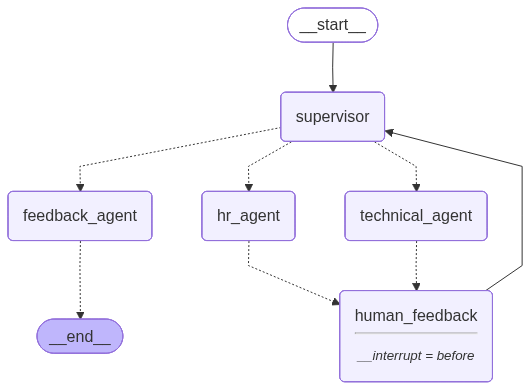

In [31]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))